In [1]:
%matplotlib inline

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn import svm, metrics, decomposition
import pylab

import os
print os.listdir("./FINAL_PICTURES/")[:5] # just print first 5 images to see filename structure
print len(os.listdir("./FINAL_PICTURES/")) 

['000001_1.jpg', '000002_3.jpg', '000003_2.jpg', '000004_4.jpg', '000005_2.jpg']
127


In [2]:
##### dont change anything in this cell
img_dir = "./FINAL_PICTURES/"
images = np.asarray([img_dir+ f for f in os.listdir(img_dir)])
labels = np.asarray([int(l[-5:-4]) for l in images])
images_and_labels = list(zip(images, labels))
print images_and_labels[:2]

[('./FINAL_PICTURES/000001_1.jpg', 1), ('./FINAL_PICTURES/000002_3.jpg', 3)]


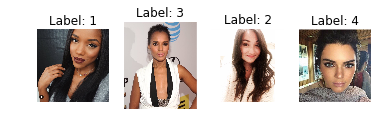

In [3]:
##### dont change anything in this cell
##### prints the first 4 images with label as a test
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(Image.open(image), interpolation='none')
    plt.title('Label: %i' % label)

In [4]:
##### dont change anything in this cell
##### define functions to resize the image so they are all the same

STANDARD_SIZE = (100,100)
def img_to_matrix(filename, verbose=False):
    """
    takes a filename and turns it into a numpy array of RGB pixels
    """
    img = Image.open(filename)
    if verbose==True:
        print "changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE))
    img = img.resize(STANDARD_SIZE,Image.ANTIALIAS)
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    return img

In [5]:
##### dont change anything in this cell

n_samples = len(images)
flat = []
for image in images:
    img = img_to_matrix(image)
    img = np.ndarray.flatten(img) # flatten means to convert into a vector, i.e. a 1-D array
    flat.append(img)

In [6]:
##### You can adjust this value (floating point 0.001 to 1.0) to see if it makes an improvement
penalty = 1.0
#########

classifier = svm.LinearSVC(C=penalty,random_state=59)

In [7]:
##### dont change anything in this cell
##### this cell randomly divides the images into training (about 70%) and test (about 30%) sets

data = np.asarray(flat)
train = []
test = []
trainL = []
testL = []
imagesPred = []
trainCat = np.random.uniform(0,1,len(data)) <= 0.7
for p in range(len(data)):
    if trainCat[p]:
        train.append(data[p])
        trainL.append(labels[p])
    else:
        test.append(data[p])
        testL.append(labels[p])
        imagesPred.append(images[p])

In [8]:
##### this reduces the dimension of the image vector from 10,000 numbers to the value of dimRed
##### using a process called Principal Component Analysis

##### you can adjust this value (integers >= 2) the higher the value, the more "complicated" the model will be
##### the higher the value of dimRed, the longer the model will take to train, so it is a trade off
dimRed = 3
#########

pca = decomposition.RandomizedPCA(n_components=dimRed)
train_x = pca.fit_transform(train)
test_x = pca.transform(test)

In [9]:
##### dont change anything in this cell
classifier.fit(train_x, trainL)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=59, tol=0.0001,
     verbose=0)

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=59, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          1       0.50      0.40      0.44        10
          2       0.25      0.43      0.32         7
          3       0.50      0.20      0.29        10
          4       0.47      0.58      0.52        12

avg / total       0.44      0.41      0.40        39


Confusion matrix:
[[4 2 1 3]
 [0 3 1 3]
 [0 6 2 2]
 [4 1 0 7]]


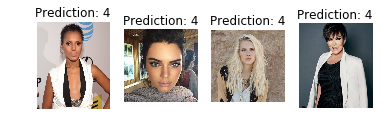

In [10]:
##### dont change anything in this cell
##### these are the results of our model predicting the intervention of the test images
##### we want large numbers on the diagonals of the confusion matrix and
##### the numbers in the avg / total line to be close to 1

expected = testL
predicted = classifier.predict(test_x)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(imagesPred, predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(Image.open(image))
    plt.title('Prediction: %i' % prediction)

plt.show()